**Задание к итоговому проекту по курсу "Python для анализа данных"**

**1. Загрузите файл HR.csv в pandas dataframe**

In [1]:
import pandas as pd

data_sat_level = pd.read_csv('/content/HR.csv')
data_sat_level.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [2]:
#Посморим на общую информацию по датасету
data_sat_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


**2. Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение)**

Исключим из расчета основных статистических показателей категориальные признаки:
- Work_accident
- left
- promotion_last_5years
- department
- salary

In [3]:
#Действительно, данные признаки являются категориальными
print(data_sat_level['Work_accident']. value_counts()) #бинарный признак
print('___________________________________\n')
print(data_sat_level['left']. value_counts()) #бинарный признак
print('___________________________________\n')
print(data_sat_level['promotion_last_5years']. value_counts()) #бинарный признак
print('___________________________________\n')
print(data_sat_level['department']. value_counts())
print('___________________________________\n')
print(data_sat_level['salary']. value_counts())

Work_accident
0    12830
1     2169
Name: count, dtype: int64
___________________________________

left
0    11428
1     3571
Name: count, dtype: int64
___________________________________

promotion_last_5years
0    14680
1      319
Name: count, dtype: int64
___________________________________

department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64
___________________________________

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64


In [4]:
print(f'Среднее значение:\n\n {data_sat_level.iloc[:, 0:-5].mean()}')

Среднее значение:

 satisfaction_level        0.612834
last_evaluation           0.716102
number_project            3.803054
average_montly_hours    201.050337
time_spend_company        3.498233
dtype: float64


In [5]:
print(f'Медиана:\n\n {data_sat_level.iloc[:, 0:-5].median()}')

Медиана:

 satisfaction_level        0.64
last_evaluation           0.72
number_project            4.00
average_montly_hours    200.00
time_spend_company        3.00
dtype: float64


In [6]:
#Мода показывает наиболее встречающееся значение признака,
#поэтому можем использовать её для всех признаков

print(f'Мода:\n\n {data_sat_level.mode()}')

Мода:

    satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                 0.1             0.55             4.0                   135   
1                 NaN              NaN             NaN                   156   

   time_spend_company  Work_accident  left  promotion_last_5years department  \
0                 3.0            0.0   0.0                    0.0      sales   
1                 NaN            NaN   NaN                    NaN        NaN   

  salary  
0    low  
1    NaN  


**Признак average_montly_hours мультимодальный** (2 моды - значения 135 (нижняя мода) и 156 (верхняя мода) встечаются одинаковое количество раз).

Как правило, для бимодального признака среднее значение и медиану следует находить отдельно для двух групп.

В нашем случае значения двух мод близки друг к другу и не сильно искажают остальные меры центральной тенденции

In [7]:
print(f'Минимальное значение:\n\n {data_sat_level.iloc[:, 0:-5].min()}')

Минимальное значение:

 satisfaction_level       0.09
last_evaluation          0.36
number_project           2.00
average_montly_hours    96.00
time_spend_company       2.00
dtype: float64


In [8]:
print(f'Максимальное значение:\n\n {data_sat_level.iloc[:, 0:-5].max()}')

Максимальное значение:

 satisfaction_level        1.0
last_evaluation           1.0
number_project            7.0
average_montly_hours    310.0
time_spend_company       10.0
dtype: float64


In [9]:
print(f'Среднее отклонение:\n\n {data_sat_level.iloc[:, 0:-5].std()}')

Среднее отклонение:

 satisfaction_level       0.248631
last_evaluation          0.171169
number_project           1.232592
average_montly_hours    49.943099
time_spend_company       1.460136
dtype: float64


In [10]:
#Для расчета основных статистических показателей можно также воспользоваться методом describe
data_sat_level.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Каких-либо аномальных/некорректных значений не выявлено.

In [11]:
#Для расчета основных статистических показателей строковых переменных можно также воспользоваться методом describe
data_sat_level.describe(include='object')

,department,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


Сводная статистика для строковой переменной:

- count - количество ненулевых значений

- unique - Количество уникальных значений

- top - наиболее часто встречающееся значение

- freq -  количество наиболее часто встречающихся значений

**3. Рассчитайте и визуализируйте корреляционную матрицу для
количественных переменных.
Определите две самые скоррелированные и две наименее
скоррелированные переменные.**

In [12]:
# Считаем коэффициенты корреляции между всеми количественными переменными
# Исключаем из расчета коэффициента корреляции категориальные признаки - Work_accident, left, promotion_last_5years, department, salary
data_sat_level.iloc[:, 0:-5].corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

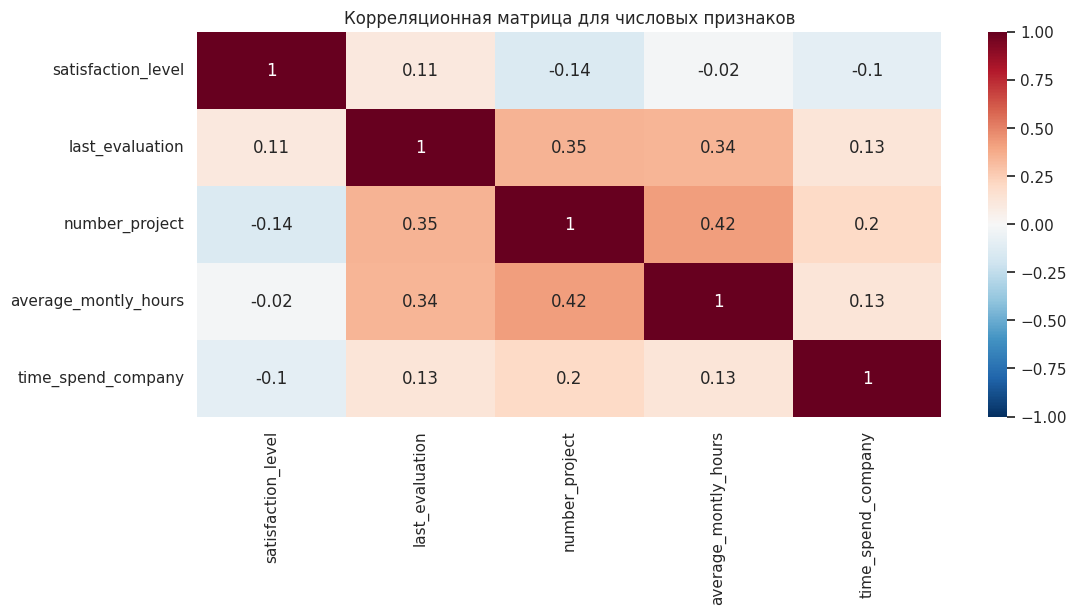

In [14]:
#Построим тепловую корреляционную матрицу

sns.set(font_scale=1.0)
plt.figure(figsize=(12,5))
sns.heatmap(
    data_sat_level.iloc[:, 0:-5].corr(),
    cmap='RdBu_r', # задаёт цветовую схему
    annot=True, # отображает значения внутри ячеек
    vmin=-1, vmax=1).set(title='Корреляционная матрица для числовых признаков'); # указывает начало цветовых кодов от -1 до 1.

**Как следует из корреляционной матрицы:**

- **Наиболее скоррелированные переменные** - number project (количество проектов, выполненных за время работы) и average montly hours (среднее количество часов на рабочем месте в месяц)

- **Наименее скоррелированные переменные** - satisfaction_level (уровень удовлетворенности работой) и average montly hours (среднее количество часов на рабочем месте в месяц)

**4. Рассчитайте сколько сотрудников работает в каждом
департаменте.**

In [15]:
employees_count = data_sat_level['department'].value_counts().to_frame().reset_index()
employees_count

,department,count
0,sales,4140
1,technical,2720
2,support,2229
3,IT,1227
4,product_mng,902
5,marketing,858
6,RandD,787
7,accounting,767
8,hr,739
9,management,630


In [17]:
department_list = employees_count['department'].to_list()

i = 0

print('Количество сотрудников в департаменте:')

for el in department_list:
    count_ = employees_count['count'].values[i]
    i+=1
    print(f'- {el} - {count_} чел.')

Количество сотрудников в департаменте:
- sales - 4140 чел.
- technical - 2720 чел.
- support - 2229 чел.
- IT - 1227 чел.
- product_mng - 902 чел.
- marketing - 858 чел.
- RandD - 787 чел.
- accounting - 767 чел.
- hr - 739 чел.
- management - 630 чел.


**5. Показать распределение сотрудников по зарплатам.**

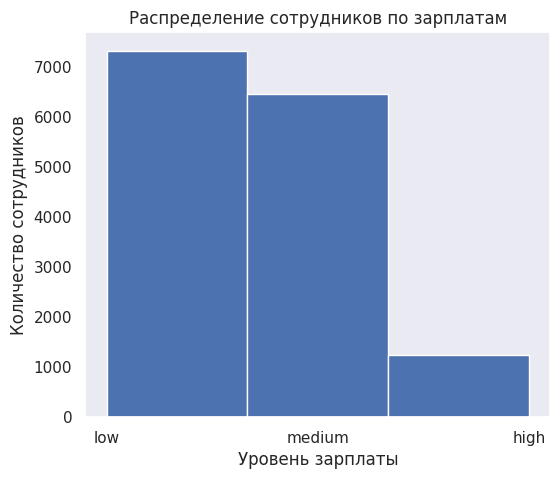

In [18]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot()

y = data_sat_level['salary']
ax.hist(y, 3)
ax.grid()

plt.title('Распределение сотрудников по зарплатам')
plt.xlabel('Уровень зарплаты')
plt.ylabel('Количество сотрудников')
plt.show()

Наибольшее количество сотрудников с низким уровнем заработной платы.

Немного меньше сотрудников со средним уровнем заработной платы.

Сотрудников с высоким уровнем заработной платы в 6/7 раз меньше, чем сотрудников двух вышеуказанных категорий.

**6. Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности.**

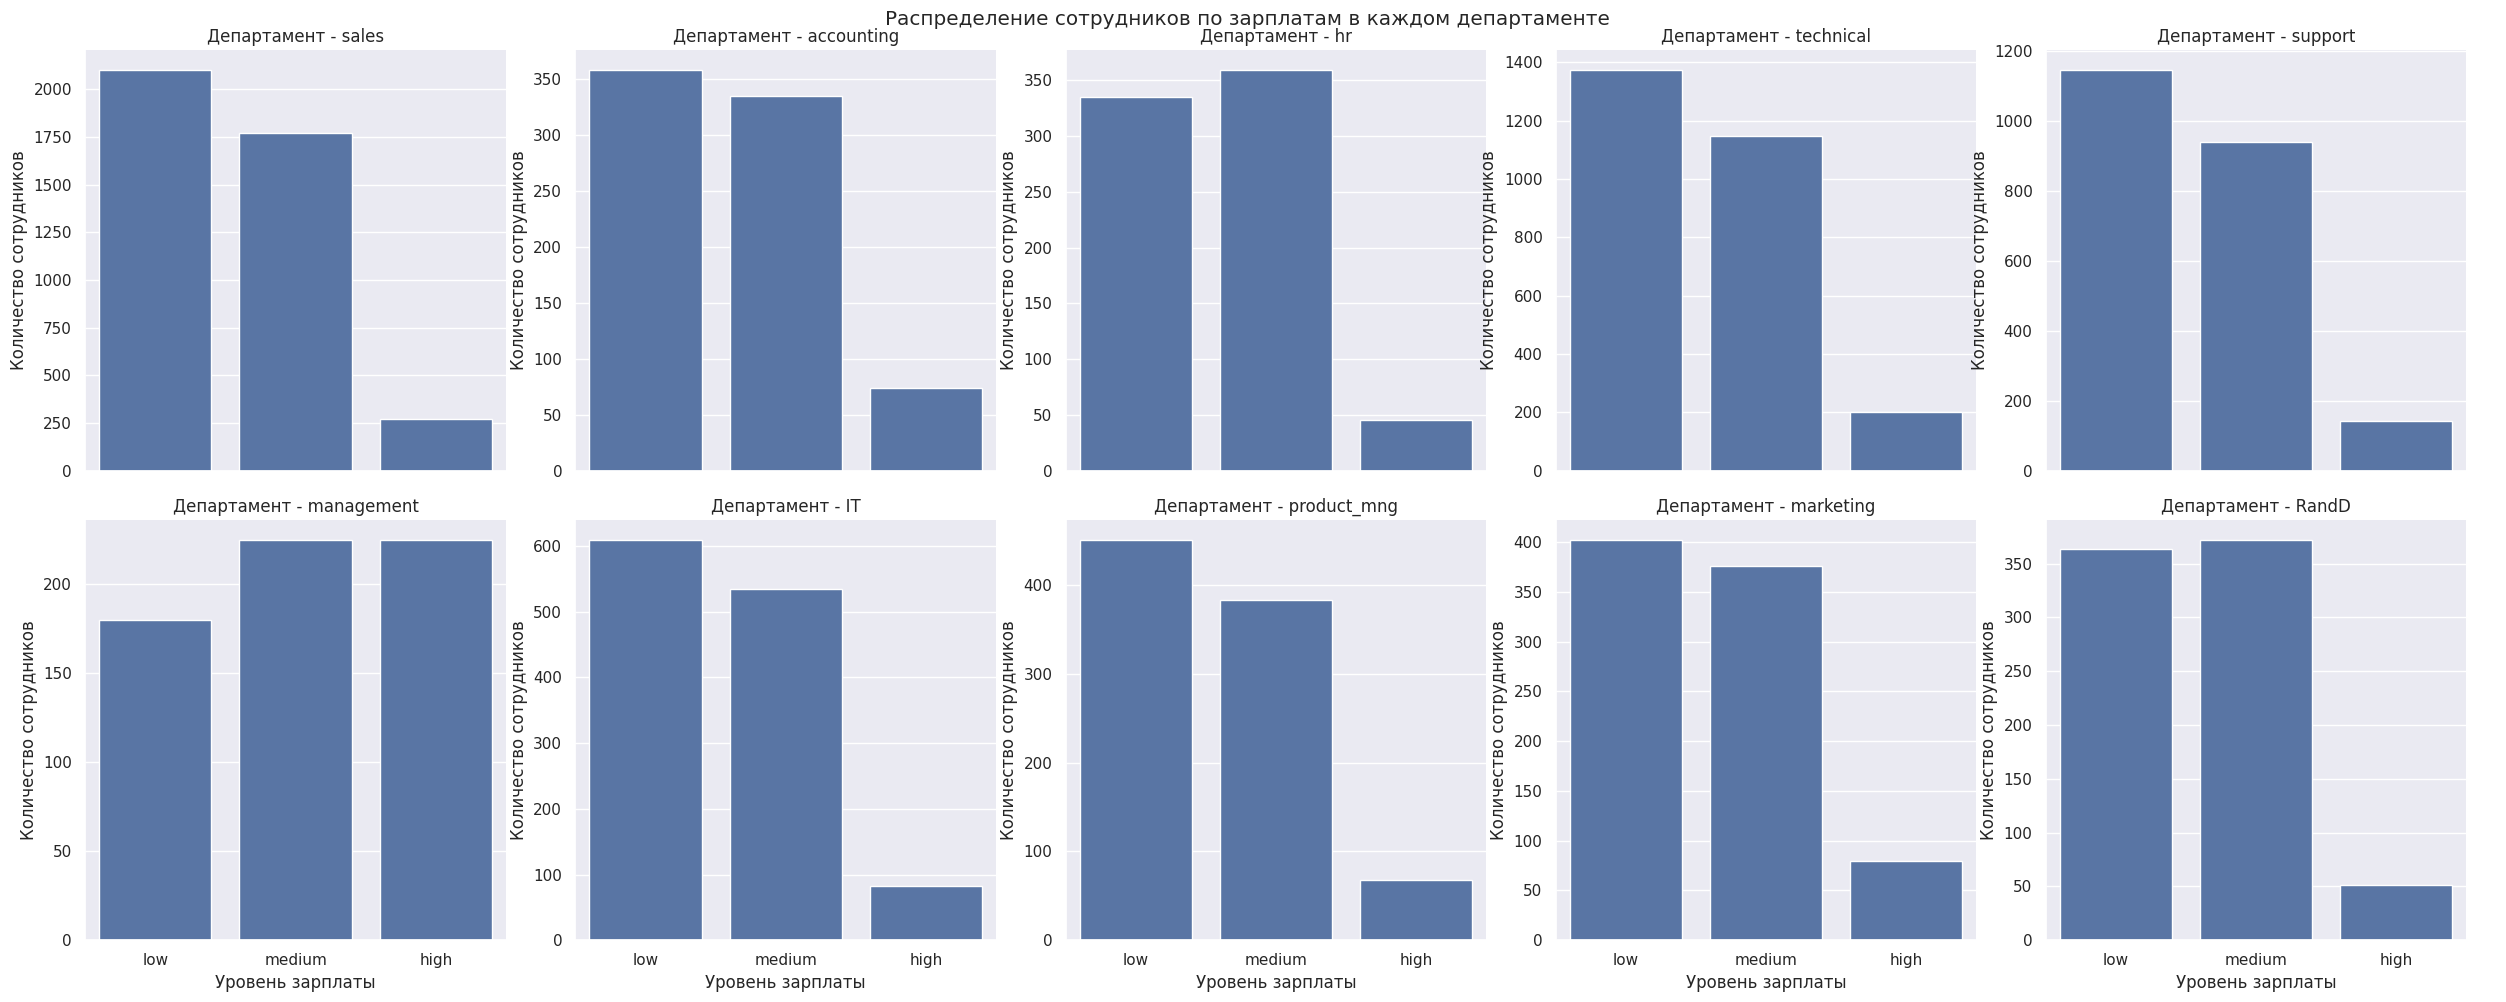

In [19]:
#Создаем набор графиков по департаментам
g = sns.catplot(data=data_sat_level,
                x='salary',
                col='department',
                kind='count',
                col_wrap=5,
                sharex=True,
                sharey=False)

g.fig.suptitle('Распределение сотрудников по зарплатам в каждом департаменте', y=1)
g.set_titles('Департамент - {col_name}')
g.set(xlabel='Уровень зарплаты',
      ylabel='Количество сотрудников',
      ylim=(0, None))

plt.show()

В рамках департаментов, в целом, наблюдаются схожие пропорции в части количества сотрудников в разрезе уровней заработных плат.

Вместе с тем только в отделе менеджмента можно отметить существенное отличие от общей группы: сотрудников с высоким и средним уровнями заработной платы больше, чем сотрудников с низким уровнем, в то время как в других департаментах количество сотрудников с высоким уровнем заработной платы заметно ниже (как правило, в 6/7 раз), чем сотрудников с низким и средним уровнями заработной платы.

**7. Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом.**

**Гипотеза** - среднее количество часов на рабочем месте среди сотрудников с низким и высоким окладами различается.

- Гипотеза Н0 - среднее количество часов на рабочем месте среди сотрудников с низким и высоким окладами НЕ различается.
- Гипотеза Н1 - среднее количество часов на рабочем месте среди сотрудников с низким и высоким окладами различается.

In [20]:
#Формируем DF с сотрудниками с низким и высоким окладами
employees_low_salary = data_sat_level.loc[(data_sat_level['salary'] == 'low')]

employees_high_salary = data_sat_level.loc[(data_sat_level['salary'] == 'high')]

In [21]:
#Создаем функцию для проверки нормальности распределения
from scipy import stats

def check_normality(data):
    #H0 - Данные распределены нормально
    #H1 - Данные распределены не нормально
    #Уровень значимости alpha=0,05
    if len(data) <= 5000:
        stat, p = stats.shapiro(data)
        if p < 0.05:
            print("Отклоняем нулевую гипотезу >> Данные распределены не нормально")
        else:
            print("Не отклоняем нулевую гипотезу >> Данные распределены нормально")
    else:
        stat, p = stats.kstest(data, 'norm')
        if p < 0.05:
            print("Отклоняем нулевую гипотезу >> Данные распределены не нормально")
        else:
            print("Не отклоняем нулевую гипотезу >> Данные распределены нормально")

**Проверим на нормальность распределения сотрудников с низким/высоким окладами по их среднему количеству часов на рабочем месте (в мес.)**

In [22]:
check_normality(employees_low_salary['average_montly_hours'])

Отклоняем нулевую гипотезу >> Данные распределены не нормально


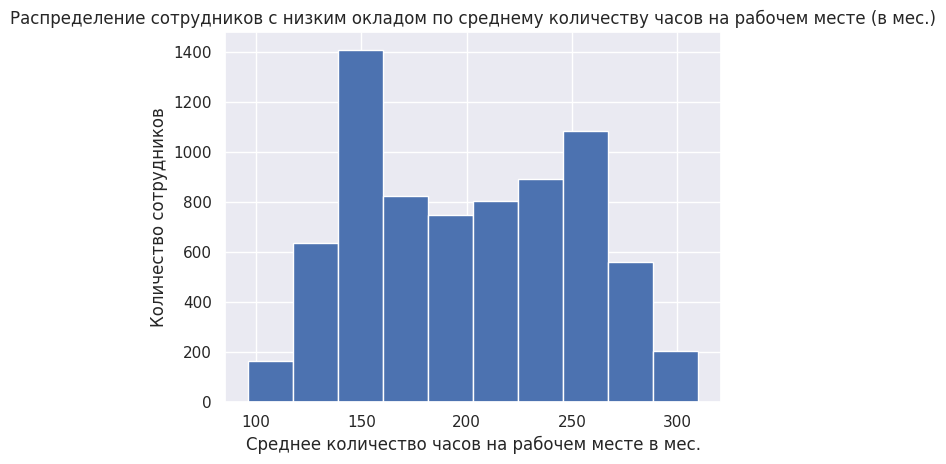

In [ ]:
plt.hist(employees_low_salary['average_montly_hours'])
plt.title('Распределение сотрудников с низким окладом по среднему количеству часов на рабочем месте (в мес.)')
plt.xlabel('Среднее количество часов на рабочем месте в мес.')
plt.ylabel('Количество сотрудников')
plt.show()

In [23]:
check_normality(employees_high_salary['average_montly_hours'])

Отклоняем нулевую гипотезу >> Данные распределены не нормально


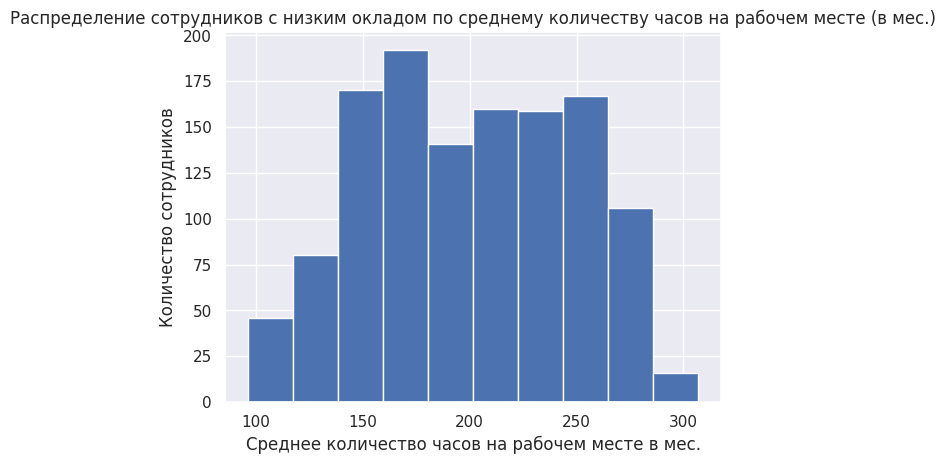

In [ ]:
plt.hist(employees_high_salary['average_montly_hours'])
plt.title('Распределение сотрудников с низким окладом по среднему количеству часов на рабочем месте (в мес.)')
plt.xlabel('Среднее количество часов на рабочем месте в мес.')
plt.ylabel('Количество сотрудников')
plt.show()

**Вывод**

Как видно из расчетов и графиков распределения, данные действительно распределены не нормально.

**Проверим равенство дисперсий**

In [24]:
stat, p = stats.levene(employees_low_salary['average_montly_hours'], employees_high_salary['average_montly_hours'])

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p <0.05:
    print("Отклоняем нулевую гипотезу >> Вариация в группах раличается")
else:
    print("Не отклоняем нулевую гипотезу >> Вариация в группах одинаковая")

Статистика = 21.77397, p = 0.00000
Отклоняем нулевую гипотезу >> Вариация в группах раличается


Поскольку данные распределены не нормально, то для проверки гипотезы используем критерий Манна-Уитни

In [25]:
#H0 - Распределения выборок одинаковы
#H1 - Распределения выборок различаются

stat, p = stats.mannwhitneyu(employees_low_salary['average_montly_hours'], employees_high_salary['average_montly_hours'])

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

Статистика = 4542795.50000, p = 0.82413
Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые


**Вывод**

Тест показал, что гипотеза Н0 подтверждается.

Следовательно, разница между средним количеством часов на рабочем месте среди сотрудников с низким и высоким окладами, вероятно, **отсутствует**.

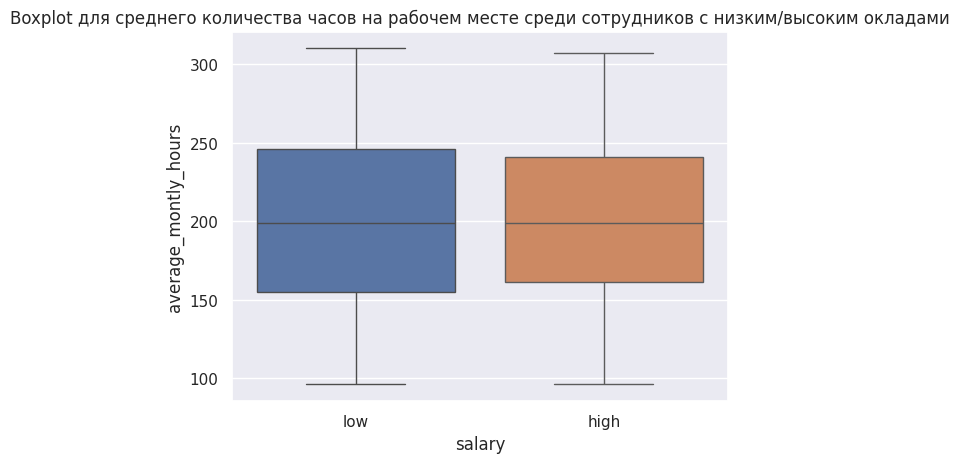

In [26]:
#Посмотрим на распределения с помощью "ящика с усами"
sns.boxplot(x='salary', y='average_montly_hours', data=employees_low_salary)
sns.boxplot(x='salary', y='average_montly_hours', data=employees_high_salary)
plt.title('Boxplot для среднего количества часов на рабочем месте среди сотрудников с низким/высоким окладами')
plt.show()

Как видно из графика, "ящики", медианы, "усы" между двумя группами практически не различаются, что также свидетельствует об отсутствии различий в среднем количестве часов на рабочем месте у работников с низким/высоким окладами.

**8. Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):**
- Доля сотрудников с повышением за последние 5 лет
- Средняя степень удовлетворенности
- Среднее количество проектов

**a) Доля сотрудников с повышением за последние 5 лет**

In [27]:
#Считаем сколько всего уволившихся сотрудников
left_employees_total = len(data_sat_level.loc[data_sat_level['left'] == 1])

#Считаем сколько сотрудников с повышением за 5 лет среди уволившихся
left_employees_with_promotion = len(data_sat_level.loc[(data_sat_level['left'] == 1) &
                                         (data_sat_level['promotion_last_5years'] == 1)])

#Считаем сколько сотрудников без повышением за 5 лет среди уволившихся
left_employees_no_promotion = left_employees_total - left_employees_with_promotion


left_employees_with_promotion_rate = (left_employees_with_promotion / left_employees_total) * 100
left_employees_no_promotion_rate = (left_employees_no_promotion / left_employees_total) * 100

print(f'Доля сотрудников с повышением за последние 5 лет (среди уволившихся): {left_employees_with_promotion_rate:.2f}%')
print(f'Доля сотрудников без повышения за последние 5 лет (среди уволившихся): {left_employees_no_promotion_rate:.2f}%')

Доля сотрудников с повышением за последние 5 лет (среди уволившихся): 0.53%
Доля сотрудников без повышения за последние 5 лет (среди уволившихся): 99.47%


**б) Средняя степень удовлетворенности**

In [28]:
data_sat_level_left = data_sat_level.loc[data_sat_level['left'] == 1]
data_sat_level_no_left = data_sat_level.loc[data_sat_level['left'] == 0]

In [29]:
avr_sat_level_left = data_sat_level_left['satisfaction_level'].mean() * 100

avr_sat_level_no_left = data_sat_level_no_left['satisfaction_level'].mean() * 100


In [30]:
print(f'Средняя степень удовлетворенности сотрудников (среди уволившихся): {avr_sat_level_left:.2f}%')
print(f'Средняя степень удовлетворенности сотрудников (среди НЕуволившихся): {avr_sat_level_no_left:.2f}%')

Средняя степень удовлетворенности сотрудников (среди уволившихся): 44.01%
Средняя степень удовлетворенности сотрудников (среди НЕуволившихся): 66.68%


**в) Среднее количество проектов**

In [31]:
avr_num_project = data_sat_level.groupby('left')['number_project'].mean().to_frame().reset_index()
avr_num_project

,left,number_project
0,0,3.786664
1,1,3.855503


In [32]:
avr_num_project_no_left = avr_num_project.iloc[0]['number_project']
avr_num_project_left = avr_num_project.iloc[1]['number_project']

In [33]:
print(f'Среднее количество проектов (среди уволившихся): {avr_num_project_no_left:.2f}')
print(f'Среднее количество проектов (среди НЕуволившихся): {avr_num_project_left:.2f}')

Среднее количество проектов (среди уволившихся): 3.79
Среднее количество проектов (среди НЕуволившихся): 3.86


**9. Разделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)
Оценить качество модели на тестовой выборки.**

In [34]:
column_to_exclude = ['left', 'department', 'salary']

In [35]:
X = data_sat_level.loc[:, ~data_sat_level.columns.isin(column_to_exclude)] #признаки
y = data_sat_level['left'] #целевая переменная

In [36]:
#Разделяем выборку на тестовую и тренировочную.
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [38]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [39]:
model_lda = LinearDiscriminantAnalysis()

In [40]:
model_lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [41]:
model_lda.score(X_test, y_test)

0.7666666666666667

**Вывод**

Наша модель (model_lda) на основе метода LDA с точностью 76,67% предсказывает значение целевой переменной (уволился сотрудник или нет).

Исходя из данной метрики, наша модель не очень точна в своих предсказаниях.

Для улучшения результата следует использовать другие модели для классификации.

**10. Загрузить jupyter notebook с решением на github и прислать ссылку**